In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

from statsmodels.tsa.stattools import grangercausalitytests

# Import Data

In [2]:
data = pd.read_csv('./data_sunrun_RUN.csv')
data['date'] = pd.to_datetime(data['Date'], errors='coerce')
data.set_index('date', inplace=True)
data.drop('Date', axis=1, inplace=True)

In [3]:
data

,daily_tweets,neg_sentiment,pos_sentiment,compound_sentiment,closing_price
date,,,,,
2015-08-05,536,0.026535,0.131679,0.152896,10.77
2015-08-06,361,0.027022,0.056310,0.056473,8.77
2015-08-07,125,0.050128,0.100672,0.068661,10.14
2015-08-10,63,0.049206,0.122540,0.098798,10.12
2015-08-11,56,0.091375,0.129625,0.039154,9.79
...,...,...,...,...,...
2021-03-25,61,0.027705,0.125852,0.188192,53.00
2021-03-26,80,0.029212,0.169575,0.294971,57.09
2021-03-29,127,0.055646,0.157047,0.206850,51.91


# Import Data Normalized

In [4]:
data_normalized =  pd.read_csv('./data_sunrun_RUN_normalized.csv')

In [5]:
data_normalized

,Date,daily_tweets,neg_sentiment,pos_sentiment,compound_sentiment,closing_price
0,2015-08-05,0.554404,0.136924,0.272730,0.371615,0.066834
1,2015-08-06,0.373057,0.139435,0.099872,0.275538,0.045064
2,2015-08-07,0.128497,0.258662,0.201615,0.287682,0.059976
3,2015-08-10,0.064249,0.253906,0.251769,0.317711,0.059758
4,2015-08-11,0.056995,0.471497,0.268019,0.258280,0.056166
...,...,...,...,...,...,...
1406,2021-03-25,0.062176,0.142958,0.259367,0.406784,0.526505
1407,2021-03-26,0.081865,0.150737,0.359644,0.513181,0.571024
1408,2021-03-29,0.130570,0.287133,0.330912,0.425375,0.514640
1409,2021-03-30,0.130570,0.228951,0.384800,0.496810,0.580059


# Lag Analysis

In [10]:
max_lag = 100

In [14]:
def plot_cross_correlation(series_1, series_2, max_lag):
    fig, ax1 = plt.subplots(figsize = (18,5))
    ax1.xcorr(series_1, series_2, usevlines = True, maxlags = max_lag, normed=True)
    axl.set_ylim(0,.7)
    ax1.grid(True)
    plt.show()

NameError: name 'axl' is not defined

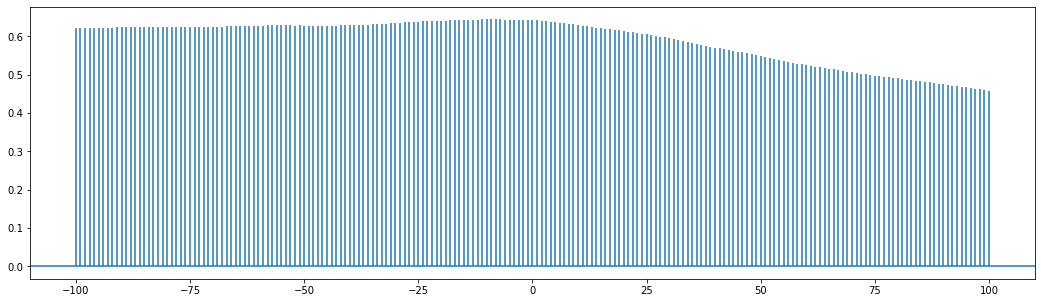

In [15]:
series_1 = data['pos_sentiment'].to_numpy().flatten()
series_2 = data['closing_price'].to_numpy().flatten()
plot_cross_correlation(series_1, series_2, max_lag)

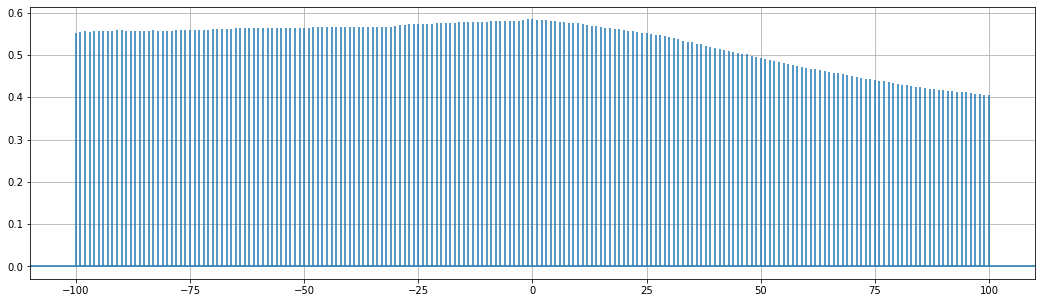

In [13]:
series_1 = data['neg_sentiment'].to_numpy().flatten()
series_2 = data['closing_price'].to_numpy().flatten()
plot_cross_correlation(series_1, series_2, max_lag)

In [ ]:
series_1 = data['compound_sentiment'].to_numpy().flatten()
series_2 = data['closing_price'].to_numpy().flatten()
plot_cross_correlation(series_1, series_2, max_lag)

# Granger Causality 

In [ ]:
data.columns

In [ ]:
input_data = np.asarray(data[['compound_sentiment', 'closing_price']])
maxlag = 10
grangercausalitytests(input_data, maxlag, addconst=True, verbose=True)

In [ ]:
input_data = np.asarray(data[['pos_sentiment', 'closing_price']])
maxlag = 10
grangercausalitytests(input_data, maxlag, addconst = True, verbose=True)

In [ ]:
input_data = np.asarray(data[['daily_tweets', 'closing_price']])
maxlag = 10
grangercausalitytests(input_data, maxlag, addconst = True, verbose=True)